In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

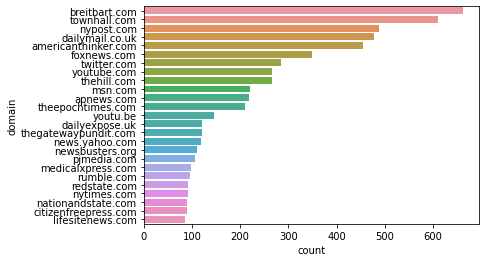

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

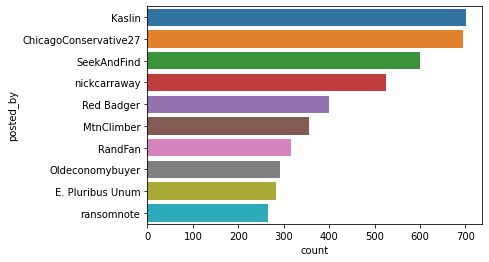

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  Kaslin                   149      1   
                     MtnClimber               202      1   
                     SeekAndFind               68      1   
apnews.com           Oldeconomybuyer          151      1   
                     RandFan                    5      1   
                     nickcarraway               2      1   
breitbart.com        SeekAndFind                1      1   
                     RandFan                    3      1   
                     ChicagoConservative27    343      1   
                     E. Pluribus Unum          47      1   
                     Red Badger                 7      1   
citizenfreepress.com MtnClimber                 1      1   
                     SeekAndFind                9      1   
                     Red Badger                47      1   
dailyexpose.uk       E. Pluribus Unum           1      1   
                     ransomnote               110      1   
dailymail.co.uk      SeekAndFind                3      1   
                     RandFan                   18      1   
                     nickcarraway               3      1   
                     E. Pluribus Unum           1      1   
                     Red Badger                 1      1   
foxnews.com          Kaslin                    44      1   
                     SeekAndFind                5      1   
                     Oldeconomybuyer            1      1   
                     RandFan                    5      1   
                     nickcarraway               6      1   
                     ChicagoConservative27     83      1   
                     E. Pluribus Unum           6      1   
                     Red Badger                 1      1   
                     ransomnote                 1      1   
lifesitenews.com     SeekAndFind                1      1   
                     Red Badger                 1      1   
                     ransomnote                 1      1   
medicalxpress.com    Red Badger                 8      1   
msn.com              SeekAndFind                4      1   
                     Oldeconomybuyer           10      1   
                     RandFan                    1      1   
                     nickcarraway              24      1   
                     ChicagoConservative27      1      1   
                     E. Pluribus Unum           4      1   
                     Red Badger                 3      1   
                     ransomnote                 2      1   
nationandstate.com   SeekAndFind               39      1   
                     Red Badger                 1      1   
news.yahoo.com       SeekAndFind                4      1   
                     Oldeconomybuyer           16      1   
                     RandFan                    1      1   
                     nickcarraway              15      1   
                     E. Pluribus Unum           2      1   
newsbusters.org      E. Pluribus Unum           1      1   
                     Red Badger                 2      1   
nypost.com           SeekAndFind                2      1   
                     RandFan                    7      1   
                     nickcarraway             104      1   
                     ChicagoConservative27     94      1   
                     E. Pluribus Unum          12      1   
                     Red Badger                 8      1   
nytimes.com          RandFan                    4      1   
                     nickcarraway               1      1   
                     E. Pluribus Unum           1      1   
pjmedia.com          SeekAndFind               50      1   
                     E. Pluribus Unum           3      1   
                     Red Badger                 1      1   
redstate.com         Kaslin                     1      1   
                     Mt

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
Police are moving in on the truckers in Ottawa [live],2022-02-07 03:58:00,252.0
Ottawa Police Horses Trample Protestors Increasing Tensions Between Protestors and Police,2022-02-19 02:37:01,198.0
Live Stupor Bowel thread,2022-02-14 01:35:45,184.0
"Canada's Justin Trudeau preparing to declare 'martial law', per report (He did it... 4:30 PM Eastern) LIVE",2022-02-14 23:47:23,164.0
Trudeau has updated his schedule. Will deliver remarks 4:30 local time. (Invokes Emergency Act) LIVE,2022-02-14 22:58:31,163.0
